In [29]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [30]:
with Image.open("thumbs-up.png") as im:
    im = im.convert("L")
# im.size

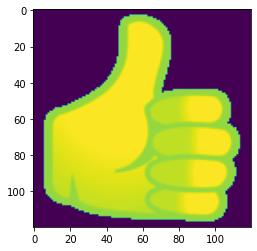

In [31]:
A = np.asarray(im)
plt.imshow(A)

In [32]:
U, Sigma, VT = np.linalg.svd(A)

In [33]:
Sigma = np.diag(Sigma)

In [34]:
p = np.divide([*range(30, 115, int((115 - 30) / 5)),], 100)
p

array([0.3 , 0.47, 0.64, 0.81, 0.98])

In [35]:
n_componants = []

for i in p:
    n_componants.append(np.argmax(np.cumsum(np.diag(Sigma))/np.sum(np.diag(Sigma)) >= i) + 1)
n_componants

[1, 2, 5, 17, 51]

Text(0, 0.5, 'Feature Importance')

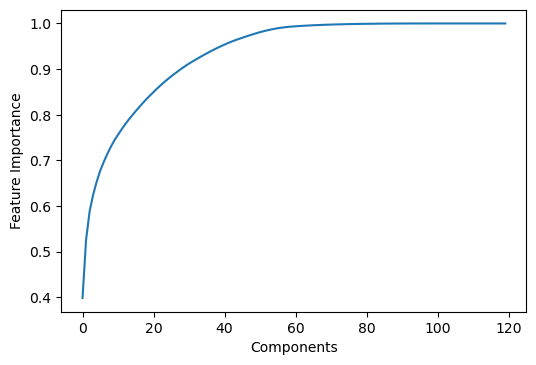

In [36]:
plt.figure(dpi=100)
plt.plot(np.cumsum(np.diag(Sigma))/np.sum(np.diag(Sigma)))
plt.xlabel("Components")
plt.ylabel("Feature Importance")

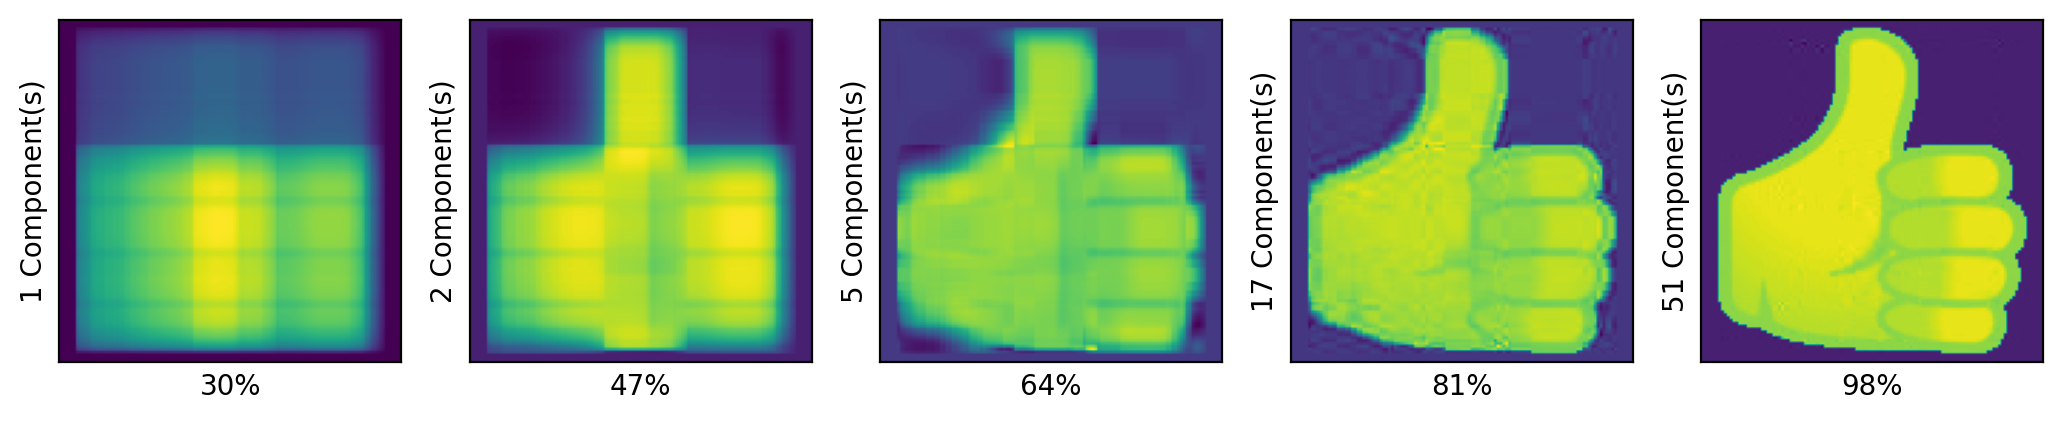

In [37]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12.8,9.6), dpi=200)
gs = gridspec.GridSpec(nrows=1, ncols=5)

for i, c in enumerate(n_componants):
    ax = fig.add_subplot(gs[0, i])
    ax.imshow(U[:,:c] @ Sigma[0:c,:c] @ VT[:c,:]) # ->
    ax.set_ylabel('%d Component(s)' % c)
    ax.set_xlabel('{:.0%}'.format(p[i]))
    ax.set_xticks([])
    ax.set_yticks([])